In [2]:
import numpy as np # để thực hiện các phép toán số học
import pandas as pd # để thao tác dữ liệu
import matplotlib.pyplot as plt # để vẽ đồ thị
from mpl_toolkits.mplot3d import Axes3D # công cụ vẽ 3D từ matplotlib

class KMEANS: # Định nghĩa lớp cho thuật toán K-Means
    
    # Hàm để khởi tạo các centers ban đầu
    @staticmethod
    def kmeans_init_centers(X, K, random_state):
        # Khởi tạo seed ngẫu nhiên
        np.random.seed(random_state)
        # Chọn ngẫu nhiên K điểm dữ liệu không trùng lặp làm Tâm ban đầu
        return X[np.random.choice(X.shape[0], K, replace=False)]

    
    # Hàm để gán nhán mới cho các điểm khi biết các centers
    @staticmethod
    def kmeans_assign_labels(X, centers):
        # Tính khoảng cách từ mỗi điểm đến mỗi Tâm
        D = np.sqrt(np.sum((X[:, np.newaxis, :] - centers) ** 2, axis=2))
        # Gán mỗi điểm vào clusters(cụm) của Tâm cụm đó
        return np.argmin(D, axis=1)

    # Hàm để cập nhật các centers mới dữa trên dữ liệu vừa được gán nhãn
    @staticmethod
    def kmeans_update_centers(X, labels, K):
        centers = np.zeros((K, X.shape[1]))
        # Cập nhật Tâm cụm là trung bình của tất cả các điểm được gán vào cụm đó
        for k in range(K):
            Xk = X[labels == k, :]
            centers[k, :] = np.mean(Xk, axis=0)
        return centers

    # Hàm để kiểm tra điều kiện dừng của thuật toán
    @staticmethod
    def has_converged(centers, new_centers):
        # Kiểm tra nếu các Tâm đã hội tụ (không thay đổi)
        return set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers])

    
    @staticmethod
    def kmeans(X, K, random_state, max_iter=100):
        centers = KMEANS.kmeans_init_centers(X, K, random_state)
        labels = []
        it = 0

        while it < max_iter:
            # Gán nhãn cho mỗi điểm dựa trên các trung tâm hiện tại
            labels = KMEANS.kmeans_assign_labels(X, centers)
            # Cập nhật các trung tâm dựa trên nhãn mới
            new_centers = KMEANS.kmeans_update_centers(X, labels, K)

            # Kiểm tra hội tụ(không thay đổi)
            if KMEANS.has_converged(centers, new_centers):
                break

            centers = new_centers
            it += 1

        return centers, labels, it

    @staticmethod
    def kmeans_display(X, labels, centroids, Feature):
        if X.shape[1] == 2:
            # Vẽ dữ liệu 2D
            fig = plt.figure(figsize=(8, 6))
            scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
            plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
            plt.xlabel(Feature[0])
            plt.ylabel(Feature[1])
            plt.title('K-Means Clustering')
            legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
            plt.gca().add_artist(legend1)
            plt.legend(loc='upper left')
            plt.show()
        elif X.shape[1] == 3:
            # Vẽ dữ liệu 3D
            fig = plt.figure(figsize=(10, 6))
            ax = fig.add_subplot(111, projection='3d')
            scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', alpha=0.6)
            ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=300, c='red', marker='X', label='Centroids')
            ax.set_xlabel(Feature[0])
            ax.set_ylabel(Feature[1])
            ax.set_zlabel(Feature[2])
            ax.set_title('K-Means Clustering')
            legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
            ax.add_artist(legend1)
            ax.legend(loc='lower left')
            plt.show()
        else:
            print(f"Cannot display clusters for {X.shape[1]}-dimensional data.")


Thuật toán tự triển khai hoàn thành sau 2 lần lặp.
Tọa độ các tâm thu được:
[[1.5 1. ]
 [4.5 3.5]]
  name  x  y  Cluster
0    A  1  1        0
1    B  2  1        0
2    C  4  3        1
3    D  5  4        1


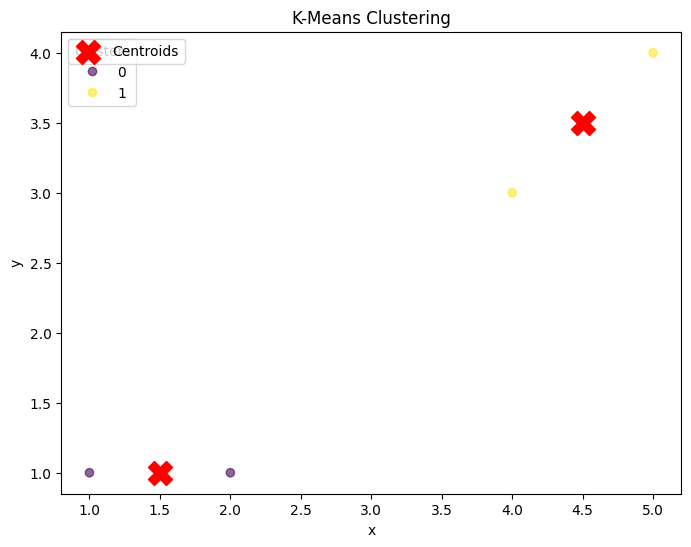

In [4]:
# Load dữ liệu
data = pd.read_excel('/kaggle/input/team2-dataset/team2_dataset/chap3.xlsx')
features = ['x', 'y']
X = data[features].values

# Áp dụng thuật toán K-Means với phương pháp tự triển khai và in ra từng bước
centers_custom, labels_custom, it_custom = KMEANS.kmeans(X, 2, random_state=0, max_iter=10)

# Thêm nhãn cụm vào DataFrame gốc
data['Cluster'] = labels_custom

# In ra số lần lặp mà thuật toán tự triển khai đã thực hiện
print(f'Thuật toán tự triển khai hoàn thành sau {it_custom} lần lặp.')
print('Tọa độ các tâm thu được:')
print(centers_custom)

# In ra một vài hàng đầu của DataFrame để kiểm tra cột nhãn cụm đã được thêm vào
print(data)

# Hiển thị kết quả phân cụm
KMEANS.kmeans_display(X, labels_custom, centers_custom, features)
